<a href="https://colab.research.google.com/github/vatturisrinivas/op_project/blob/main/Design_a_Deep_learning_Network_for_Robust_Bi_Tempered_Logistic_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6501 - loss: 0.9654 - val_accuracy: 0.8407 - val_loss: 0.6489
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8465 - loss: 0.6849 - val_accuracy: 0.8392 - val_loss: 0.6196
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.6177 - val_accuracy: 0.8378 - val_loss: 0.6148
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.6498 - val_accuracy: 0.8378 - val_loss: 0.6199
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: 0.6205 - val_accuracy: 0.8378 - val_loss: 0.6112
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.6242 - val_accuracy: 0.8392 - val_loss: 0.6097
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.6362 - val_accuracy: 0.8422 - val_loss: 0.6017
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.6023 - val_accuracy: 0.8437 - val_loss: 0.5991
Epo

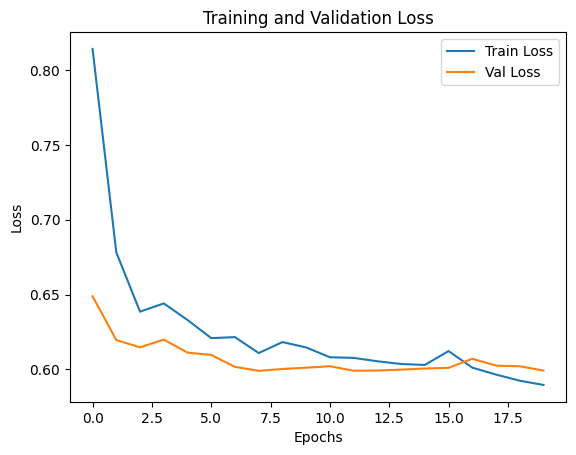

In [ ]:
import kagglehub, pandas as pd, tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Download & load dataset
path = kagglehub.dataset_download("naveengowda16/logistic-regression-heart-disease-prediction")
df = pd.read_csv(path + "/framingham_heart_disease.csv")

# Handle missing values
num_cols = ['education','cigsPerDay','totChol','BMI','heartRate','glucose']
df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])
df['BPMeds'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['BPMeds']])

# Split & scale data
X = StandardScaler().fit_transform(df.drop(columns=['TenYearCHD']))
y = df['TenYearCHD'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bi-Tempered Logistic Loss
def bi_tempered_logistic_loss(y_true, y_pred, alpha=1.0, beta=1.0):
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
    loss = tf.where(y_true==1, -tf.math.log(y_pred)*(1+beta*(1-y_pred))**alpha,
                    -tf.math.log(1-y_pred)*(1+beta*y_pred)**alpha)
    return tf.reduce_mean(loss)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile & train
model.compile(optimizer='adam', loss=bi_tempered_logistic_loss, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
